In [12]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [14]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpdmmbe4zxGP2
Verbose mode active!


In [15]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_masks.npy')

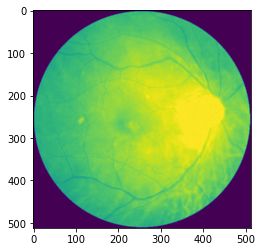

In [16]:
plt.imshow(images[10])

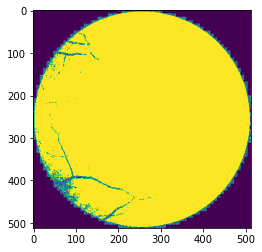

In [17]:
plt.imshow(masks[10])

In [18]:
len(images)

6392

In [23]:
# Check shapes of arrays
print(images.shape)
print(masks.shape)
print(weights.shape)

(6392, 512, 512, 1)
(6392, 512, 512, 1)


AttributeError: 'dict' object has no attribute 'shape'

In [20]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [25]:
#
#
weights = np.expand_dims(weights, axis=(1, 2, 3)) # adjust axis values as needed

A = np.concatenate((images, masks, weights), axis=-1)

R.setup_data(images, masks, dataset_size=6392, weights=weights)

AxisError: axis 3 is out of bounds for array of dimension 3

In [26]:
RUNS = 5

In [27]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0


AttributeError: 'NoneType' object has no attribute 'to_array'

In [17]:
R.classifier_scores

[[-201.56130981445312, 1.2717903852462769],
 [-225.53067016601562, 1.3000315427780151],
 [-246.53582763671875, 1.3258417844772339],
 [-265.2281494140625, 1.3436616659164429],
 [-334.8204650878906, 1.3893414735794067]]

In [18]:
R.discriminator_scores

[[394.1426086425781, 0.75],
 [0.4090917110443115, 0.8125],
 [221.94296264648438, 0.75],
 [244.54798889160156, 0.8125],
 [0.2878209948539734, 0.8125]]

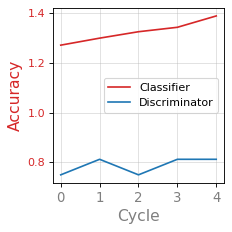

In [19]:
R.plot()